In [44]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [45]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [46]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [47]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [48]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [49]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/999 [00:00<?, ?it/s]

In [ ]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

In [ ]:
df.to_csv("Amazon_Reviews_Oneplus_Nord_CE2.csv")

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

In [ ]:
# loading the dataset
reviews=pd.read_csv('Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

In [ ]:
reviews.Rating.describe()

In [ ]:
#Number of Words
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

In [ ]:
#No of characters
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

In [ ]:
#Average Word Length
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

In [ ]:
#No of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

In [ ]:
#Number of special characters
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

In [ ]:
#No of numerics
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

In [ ]:
#no of Uppercase words
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

In [ ]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

In [ ]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

In [78]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0    29
1    25
2    30
3    20
4    27
5    30
6    25
7    25
8    25
9    28
Name: Review_Date, dtype: object 
 0    August
1    August
2    August
3    August
4    August
5    August
6    August
7    August
8    August
9    August
Name: Review_Date, dtype: object 
 0    2023
1    2023
2    2023
3    2023
4    2023
5    2023
6    2023
7    2023
8    2023
9    2023
Name: Review_Date, dtype: object


In [79]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,29,August,2023
1,25,August,2023
2,30,August,2023
3,20,August,2023
4,27,August,2023
5,30,August,2023
6,25,August,2023
7,25,August,2023
8,25,August,2023
9,28,August,2023


In [80]:
df.Month.value_counts()

August    10
Name: Month, dtype: int64

In [81]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,August
1,August
2,August
3,August
4,August
5,August
6,August
7,August
8,August
9,August


In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       10 non-null     float64
 1   Title        10 non-null     object 
 2   Review       10 non-null     object 
 3   Review_Date  10 non-null     object 
 4   Date         10 non-null     object 
 5   Month        10 non-null     object 
 6   Year         10 non-null     object 
dtypes: float64(1), object(6)
memory usage: 688.0+ bytes


In [83]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date,Month,Year
0,4.0,4.0 out of 5 stars\nGood budget phone from One...,"Good for first time OnePlus users, compared to...",29,August,2023
1,4.0,4.0 out of 5 stars\nValue for money for one plus,First of all this phone is value for money for...,25,August,2023
2,4.0,4.0 out of 5 stars\nCamera Quality,Best one plus mobile in low budget but need to...,30,August,2023
3,4.0,4.0 out of 5 stars\nOverall Good for light use,Overall good for light uses but not good for c...,20,August,2023
4,4.0,4.0 out of 5 stars\nBest,Battery backup ok but ?,27,August,2023


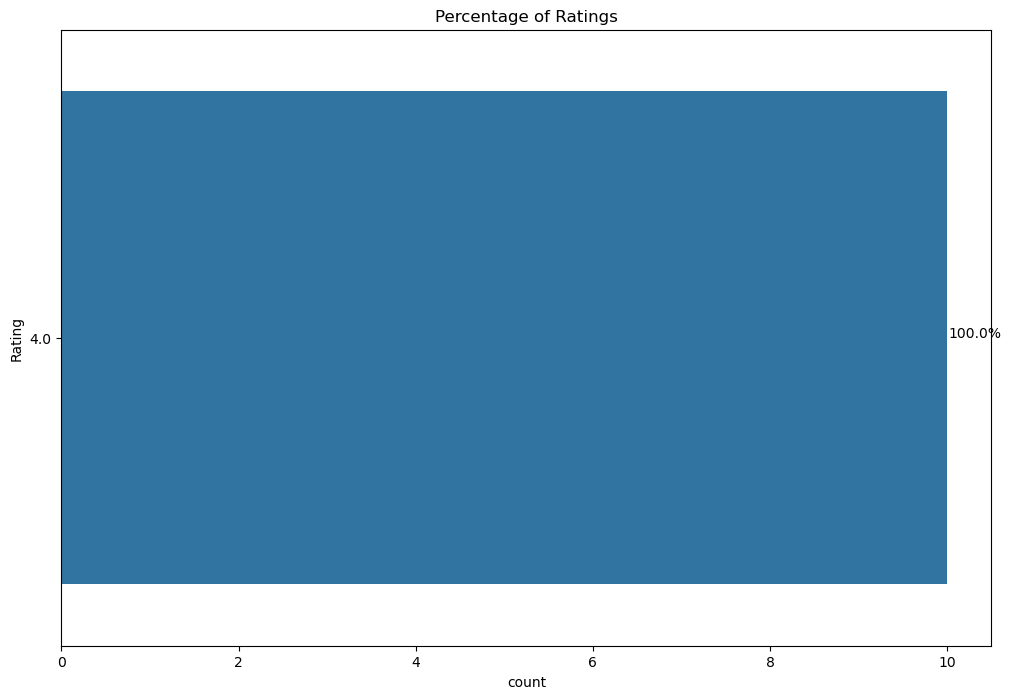

In [84]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [85]:
data = df[['Review']]
data

,Review
0,"Good for first time OnePlus users, compared to..."
1,First of all this phone is value for money for...
2,Best one plus mobile in low budget but need to...
3,Overall good for light uses but not good for c...
4,Battery backup ok but ?
5,Camera is good .
6,All Hardware specifications are good but Oxyge...
7,To Bahetar Yahi Hai Ki Aap Latest Phones Ki Ta...
8,NICE MOBILE
9,Except camera rest of things are fine.


In [86]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [87]:
data

,Review
0,"good first time oneplus users, compared mid ra..."
1,first phone value money price . but one plus n...
2,best one plus mobile low budget need improve c...
3,overall good light uses good camera lovers. in...
4,battery backup ok ?
5,camera good .
6,all hardware specifications good oxygen os dis...
7,to bahetar yahi hai ki aap latest phones ki ta...
8,nice mobile
9,except camera rest things fine.


In [88]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/10 [00:00<?, ?it/s]

In [89]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,good first time oneplus user compared mid rang...,"Good for first time OnePlus users, compared to..."
1,first phone value money price one plus name co...,First of all this phone is value for money for...
2,best one plus mobile low budget need improve c...,Best one plus mobile in low budget but need to...
3,overall good light us good camera lover day li...,Overall good for light uses but not good for c...
4,battery backup ok,Battery backup ok but ?


In [90]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [91]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,good first time oneplus user compared mid rang...,"Good for first time OnePlus users, compared to..."
1,first phone value money price one plus name co...,First of all this phone is value for money for...
2,best one plus mobile low budget need improve c...,Best one plus mobile in low budget but need to...
3,overall good light us good camera lover day li...,Overall good for light uses but not good for c...
4,battery backup ok,Battery backup ok but ?
5,camera good,Camera is good .
6,hardware specification good oxygen o disappont...,All Hardware specifications are good but Oxyge...
7,bahetar yahi hai ki aap latest phone ki taraf ...,To Bahetar Yahi Hai Ki Aap Latest Phones Ki Ta...
8,nice mobile,NICE MOBILE
9,except camera rest thing fine,Except camera rest of things are fine.


In [92]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,good first time oneplus user compared mid rang...,"Good for first time OnePlus users, compared to..."
1,first phone value money price one plus name co...,First of all this phone is value for money for...
2,best one plus mobile low budget need improve c...,Best one plus mobile in low budget but need to...
3,overall good light us good camera lover day li...,Overall good for light uses but not good for c...
4,battery backup ok,Battery backup ok but ?
5,camera good,Camera is good .
6,hardware specification good oxygen o disappont...,All Hardware specifications are good but Oxyge...
7,bahetar yahi hai ki aap latest phone ki taraf ...,To Bahetar Yahi Hai Ki Aap Latest Phones Ki Ta...
8,nice mobile,NICE MOBILE
9,except camera rest thing fine,Except camera rest of things are fine.


In [93]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,good first time oneplus user compared mid rang...,"Good for first time OnePlus users, compared to..."
1,first phone value money price one plus name co...,First of all this phone is value for money for...
2,best one plus mobile low budget need improve c...,Best one plus mobile in low budget but need to...
3,overall good light us good camera lover day li...,Overall good for light uses but not good for c...
4,battery backup ok,Battery backup ok but ?
5,camera good,Camera is good .
6,hardware specification good oxygen o disappont...,All Hardware specifications are good but Oxyge...
7,bahetar yahi hai ki aap latest phone ki taraf ...,To Bahetar Yahi Hai Ki Aap Latest Phones Ki Ta...
8,nice mobile,NICE MOBILE
9,except camera rest thing fine,Except camera rest of things are fine.


In [94]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,good first time oneplus user compared mid rang...,"Good for first time OnePlus users, compared to..."
1,first phone value money price one plus name co...,First of all this phone is value for money for...
2,best one plus mobile low budget need improve c...,Best one plus mobile in low budget but need to...
3,overall good light us good camera lover day li...,Overall good for light uses but not good for c...
4,battery backup ok,Battery backup ok but ?
5,camera good,Camera is good .
6,hardware specification good oxygen o disappont...,All Hardware specifications are good but Oxyge...
7,bahetar yahi hai ki aap latest phone ki taraf ...,To Bahetar Yahi Hai Ki Aap Latest Phones Ki Ta...
8,nice mobile,NICE MOBILE
9,except camera rest thing fine,Except camera rest of things are fine.


In [95]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,good first time oneplus user compared mid rang...,"Good for first time OnePlus users, compared to..."
1,first phone value money price one plus name co...,First of all this phone is value for money for...
2,best one plus mobile low budget need improve c...,Best one plus mobile in low budget but need to...
3,overall good light us good camera lover day li...,Overall good for light uses but not good for c...
4,battery backup ok,Battery backup ok but ?
5,camera good,Camera is good .
6,hardware specification good oxygen o disappont...,All Hardware specifications are good but Oxyge...
7,bahetar yahi hai ki aap latest phone ki taraf ...,To Bahetar Yahi Hai Ki Aap Latest Phones Ki Ta...
8,nice mobile,NICE MOBILE
9,except camera rest thing fine,Except camera rest of things are fine.


In [96]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [97]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,good first time oneplus user compared mid rang...,"Good for first time OnePlus users, compared to..."
1,first phone value money price one plus name co...,First of all this phone is value for money for...
2,best one plus mobile low budget need improve c...,Best one plus mobile in low budget but need to...
3,overall good light us good camera lover day li...,Overall good for light uses but not good for c...
4,battery backup ok,Battery backup ok but ?
5,camera good,Camera is good .
6,hardware specification good oxygen o disappont...,All Hardware specifications are good but Oxyge...
7,bahetar yahi hai ki aap latest phone ki taraf ...,To Bahetar Yahi Hai Ki Aap Latest Phones Ki Ta...
8,nice mobile,NICE MOBILE
9,except camera rest thing fine,Except camera rest of things are fine.


In [98]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [99]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,good first time oneplus user compared mid rang...,"Good for first time OnePlus users, compared to..."
1,first phone value money price one plus name co...,First of all this phone is value for money for...
2,best one plus mobile low budget need improve c...,Best one plus mobile in low budget but need to...
3,overall good light us good camera lover day li...,Overall good for light uses but not good for c...
4,battery backup ok,Battery backup ok but ?
5,camera good,Camera is good .
6,hardware specification good oxygen o disappont...,All Hardware specifications are good but Oxyge...
7,bahetar yahi hai ki aap latest phone ki taraf ...,To Bahetar Yahi Hai Ki Aap Latest Phones Ki Ta...
8,nice mobile,NICE MOBILE
9,except camera rest thing fine,Except camera rest of things are fine.


In [113]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,good first time oneplus user compared mid rang...,"Good for first time OnePlus users, compared to...","[good, first, time, oneplus, user, compared, m..."
1,first phone value money price one plus name co...,First of all this phone is value for money for...,"[first, phone, value, money, price, one, plus,..."
2,best one plus mobile low budget need improve c...,Best one plus mobile in low budget but need to...,"[best, one, plus, mobile, low, budget, need, i..."
3,overall good light us good camera lover day li...,Overall good for light uses but not good for c...,"[overall, good, light, us, good, camera, lover..."
4,battery backup ok,Battery backup ok but ?,"[battery, backup, ok]"
5,camera good,Camera is good .,"[camera, good]"
6,hardware specification good oxygen o disappont...,All Hardware specifications are good but Oxyge...,"[hardware, specification, good, oxygen, o, dis..."
7,bahetar yahi hai ki aap latest phone ki taraf ...,To Bahetar Yahi Hai Ki Aap Latest Phones Ki Ta...,"[bahetar, yahi, hai, ki, aap, latest, phone, k..."
8,nice mobile,NICE MOBILE,"[nice, mobile]"
9,except camera rest thing fine,Except camera rest of things are fine.,"[except, camera, rest, thing, fine]"


In [114]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [117]:
import codecs
with codecs.open("stop (1).txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])
    

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [118]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [119]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,good first time oneplus user compared mid rang...,"Good for first time OnePlus users, compared to..."
1,first phone value money price one plus name co...,First of all this phone is value for money for...
2,best one plus mobile low budget need improve c...,Best one plus mobile in low budget but need to...
3,overall good light us good camera lover day li...,Overall good for light uses but not good for c...
4,battery backup ok,Battery backup ok but ?
5,camera good,Camera is good .
6,hardware specification good oxygen disapponts ...,All Hardware specifications are good but Oxyge...
7,bahetar yahi hai ki aap latest phone ki taraf ...,To Bahetar Yahi Hai Ki Aap Latest Phones Ki Ta...
8,nice mobile,NICE MOBILE
9,except camera rest thing fine,Except camera rest of things are fine.


In [120]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['first', 'phone', 'value', 'money', 'price', 'one', 'plus', 'name', 'come', 'come', 'average', 'compare', 'one', 'plus', 'time', 'stuck', 'performance', 'overall', 'value', 'money', 'smartphone'])

In [121]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [good, first, time, oneplus, user, compared, m...
1    [first, phone, value, money, price, one, plus,...
2    [best, one, plus, mobile, low, budget, need, i...
3    [overall, good, light, us, good, camera, lover...
4                                [battery, backup, ok]
5                                       [camera, good]
6    [hardware, specification, good, oxygen, disapp...
7    [bahetar, yahi, hai, ki, aap, latest, phone, k...
8                                       [nice, mobile]
9                  [except, camera, rest, thing, fine]
Name: Clean_Reviews, dtype: object

In [122]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [123]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,good first time oneplus user compar mid rang p...
1,first phone valu money price one plus name com...
2,best one plus mobil low budget need improv camera
3,overal good light us good camera lover day lig...
4,batteri backup ok
5,camera good
6,hardwar specif good oxygen disappont user frie...
7,bahetar yahi hai ki aap latest phone ki taraf ...
8,nice mobil
9,except camera rest thing fine


In [124]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lilly\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,stemmed
0,good first time oneplus user compared mid rang...
1,first phone value money price one plus name co...
2,best one plus mobile low budget need improve c...
3,overall good light u good camera lover day lig...
4,battery backup ok
5,camera good
6,hardware specification good oxygen disapponts ...
7,bahetar yahi hai ki aap latest phone ki taraf ...
8,nice mobile
9,except camera rest thing fine


In [125]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [126]:
print(tweetscv.toarray()[100:200])

[]


In [127]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/10 [00:00<?, ?it/s]

In [128]:
corpus[3]

'overal good light us good camera lover day light outdoor camera qualiti best indoor camera qualiti good pro one plu mobil use experi awesom'

In [129]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [130]:
X.shape

(10, 374)

In [131]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/10 [00:00<?, ?it/s]

In [132]:
corpus[4]

'batteri backup ok'

In [133]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [134]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'good first time oneplus user compared mid range phone oneplus good even though latest version ce still good mobile go feel price segment worth go always defective device go brand happy amazon quick delivery first phone value money price one plus name come come average compare one plus time stuck performance overall value money smartphone best one plus mobile low budget need improve camera overall good light us good camera lover day light outdoor camera quality best indoor camera quality good pro one plus mobile use experience awesome battery backup ok camera good hardware specification good oxygen disapponts user friendly like mi customised android segement bahetar yahi hai ki aap latest phone ki taraf jaye vaise baki chizo phone achha work kar rha hai lekin ab ye bhi year se jada old ho gya h brand halaki one plus hain lekin aapko one plus wali feeling nahi ayegi nice mobile except camera rest thing fine'

In [137]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [138]:
for token in doc_block[:50]:
    print(token,token.pos_)  

good ADJ
first ADJ
time NOUN
oneplus NOUN
user NOUN
compared VERB
mid ADJ
range NOUN
phone NOUN
oneplus NOUN
good ADJ
even ADV
though SCONJ
latest ADJ
version NOUN
ce VERB
still ADV
good ADJ
mobile ADJ
go NOUN
feel VERB
price NOUN
segment NOUN
worth ADJ
go VERB
always ADV
defective ADJ
device NOUN
go VERB
brand NOUN
happy ADJ
amazon PROPN
quick ADJ
delivery NOUN
first ADJ
phone NOUN
value NOUN
money NOUN
price NOUN
one NUM
plus CCONJ
name NOUN
come AUX
come VERB
average ADJ
compare NOUN
one NUM
plus CCONJ
time NOUN
stuck VERB


In [139]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

[]


In [140]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,camera,6
1,phone,4
2,go,3
3,time,2
4,oneplus,2
5,user,2
6,price,2
7,brand,2
8,value,2
9,money,2


<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

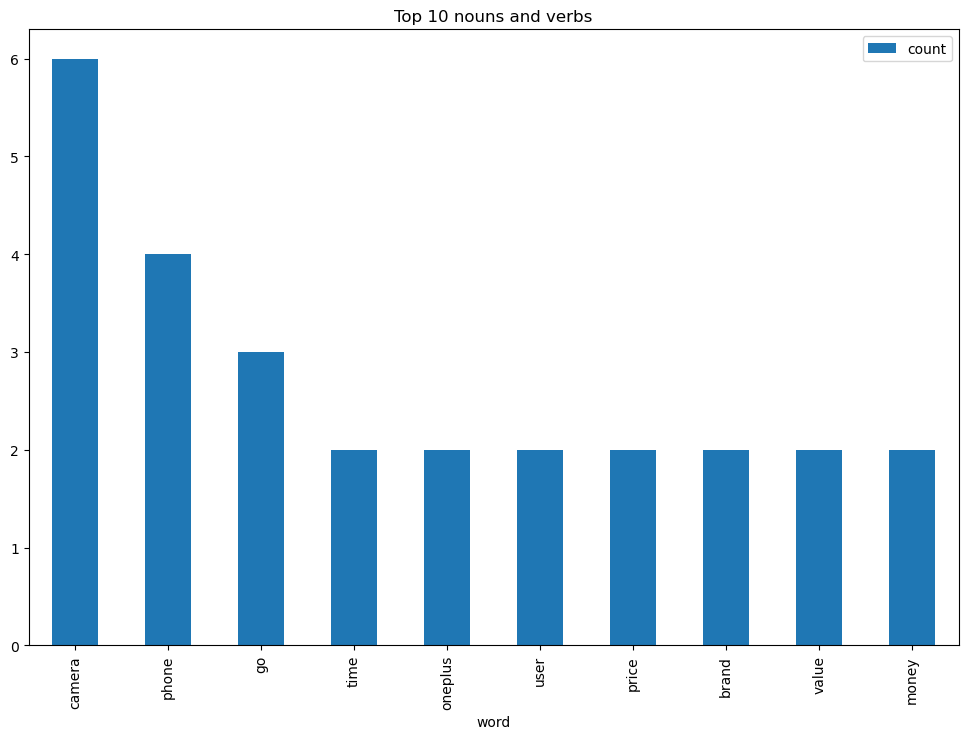

In [141]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [142]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [143]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [144]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,10


In [145]:
dataframe.Clean_Reviews[8]

'nice mobile'

In [146]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'compound': 0.4215}

In [147]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,good first time oneplus user compared mid rang...,"{'neg': 0.063, 'neu': 0.588, 'pos': 0.349, 'co..."
1,first phone value money price one plus name co...,"{'neg': 0.081, 'neu': 0.726, 'pos': 0.194, 'co..."
2,best one plus mobile low budget need improve c...,"{'neg': 0.138, 'neu': 0.395, 'pos': 0.467, 'co..."
3,overall good light us good camera lover day li...,"{'neg': 0.0, 'neu': 0.464, 'pos': 0.536, 'comp..."
4,battery backup ok,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp..."


In [148]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,good first time oneplus user compared mid rang...,"{'neg': 0.063, 'neu': 0.588, 'pos': 0.349, 'co...",0.9022
1,first phone value money price one plus name co...,"{'neg': 0.081, 'neu': 0.726, 'pos': 0.194, 'co...",0.4215
2,best one plus mobile low budget need improve c...,"{'neg': 0.138, 'neu': 0.395, 'pos': 0.467, 'co...",0.7184
3,overall good light us good camera lover day li...,"{'neg': 0.0, 'neu': 0.464, 'pos': 0.536, 'comp...",0.9674
4,battery backup ok,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.2960


In [149]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,good first time oneplus user compared mid rang...,"{'neg': 0.063, 'neu': 0.588, 'pos': 0.349, 'co...",0.9022,Positive
1,first phone value money price one plus name co...,"{'neg': 0.081, 'neu': 0.726, 'pos': 0.194, 'co...",0.4215,Positive
2,best one plus mobile low budget need improve c...,"{'neg': 0.138, 'neu': 0.395, 'pos': 0.467, 'co...",0.7184,Positive
3,overall good light us good camera lover day li...,"{'neg': 0.0, 'neu': 0.464, 'pos': 0.536, 'comp...",0.9674,Positive
4,battery backup ok,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.2960,Positive
5,camera good,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,Positive
6,hardware specification good oxygen disapponts ...,"{'neg': 0.0, 'neu': 0.511, 'pos': 0.489, 'comp...",0.8225,Positive
7,bahetar yahi hai ki aap latest phone ki taraf ...,"{'neg': 0.0, 'neu': 0.965, 'pos': 0.035, 'comp...",0.1280,Positive
8,nice mobile,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,Positive
9,except camera rest thing fine,"{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...",0.2023,Positive


In [150]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')


ValueError: Length mismatch: Expected axis has 0 elements, new values have 2 elements

<AxesSubplot:xlabel='sentiment', ylabel='count'>

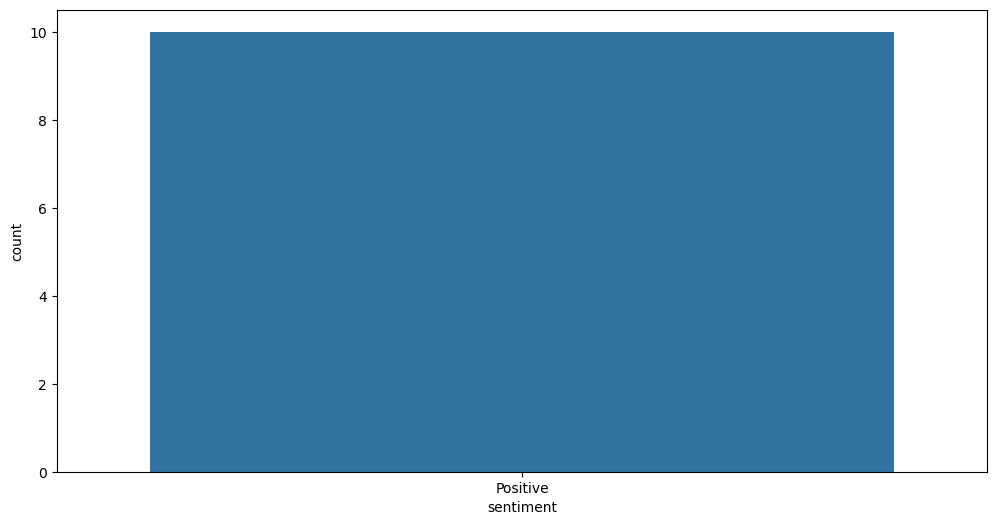

In [151]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

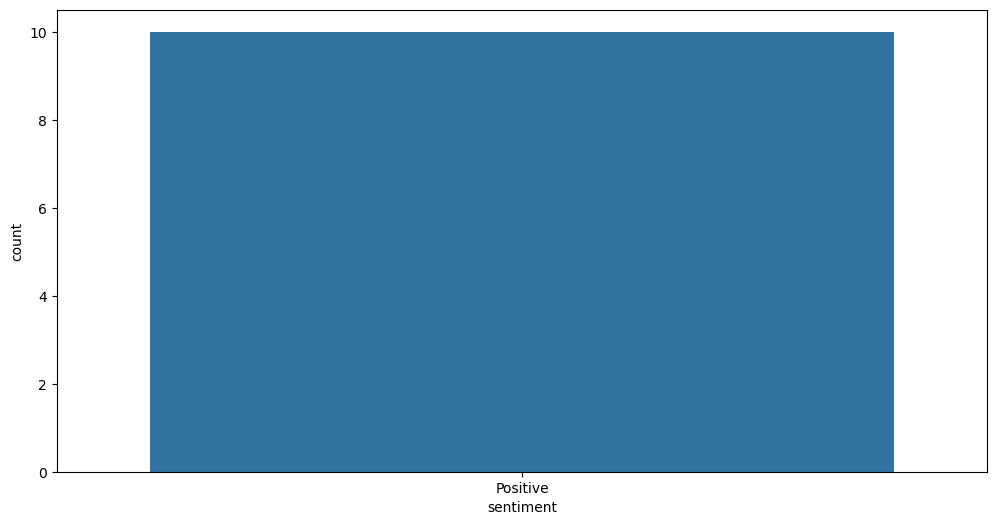

In [152]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

In [153]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,10


In [154]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,good first time oneplus user compared mid rang...,"Good for first time OnePlus users, compared to...",0.514815,0.475926
1,first phone value money price one plus name co...,First of all this phone is value for money for...,0.244444,0.033333
2,best one plus mobile low budget need improve c...,Best one plus mobile in low budget but need to...,0.300000,0.500000
3,overall good light us good camera lover day li...,Overall good for light uses but not good for c...,0.562500,0.612500
4,battery backup ok,Battery backup ok but ?,0.500000,0.500000


Text(0, 0.5, 'Subjectivity')

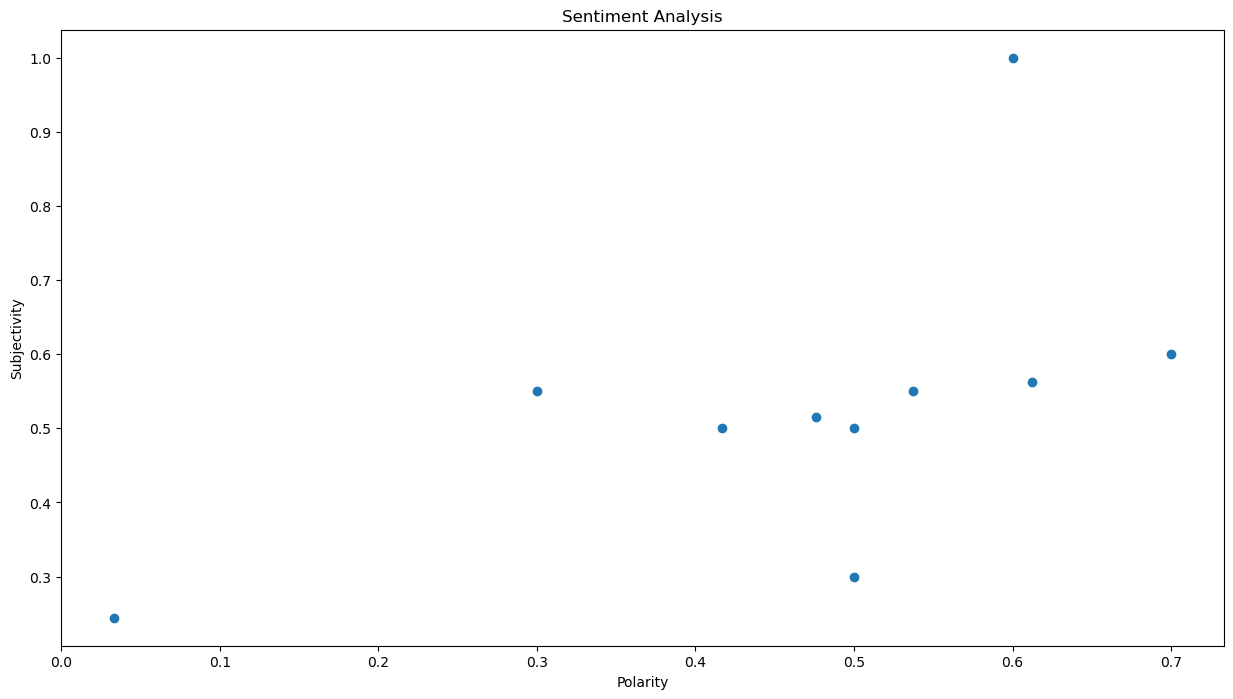

In [155]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [156]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity,sentiment
0,good first time oneplus user compared mid rang...,"Good for first time OnePlus users, compared to...",0.514815,0.475926,pos
1,first phone value money price one plus name co...,First of all this phone is value for money for...,0.244444,0.033333,pos
2,best one plus mobile low budget need improve c...,Best one plus mobile in low budget but need to...,0.300000,0.500000,pos
3,overall good light us good camera lover day li...,Overall good for light uses but not good for c...,0.562500,0.612500,pos
4,battery backup ok,Battery backup ok but ?,0.500000,0.500000,pos


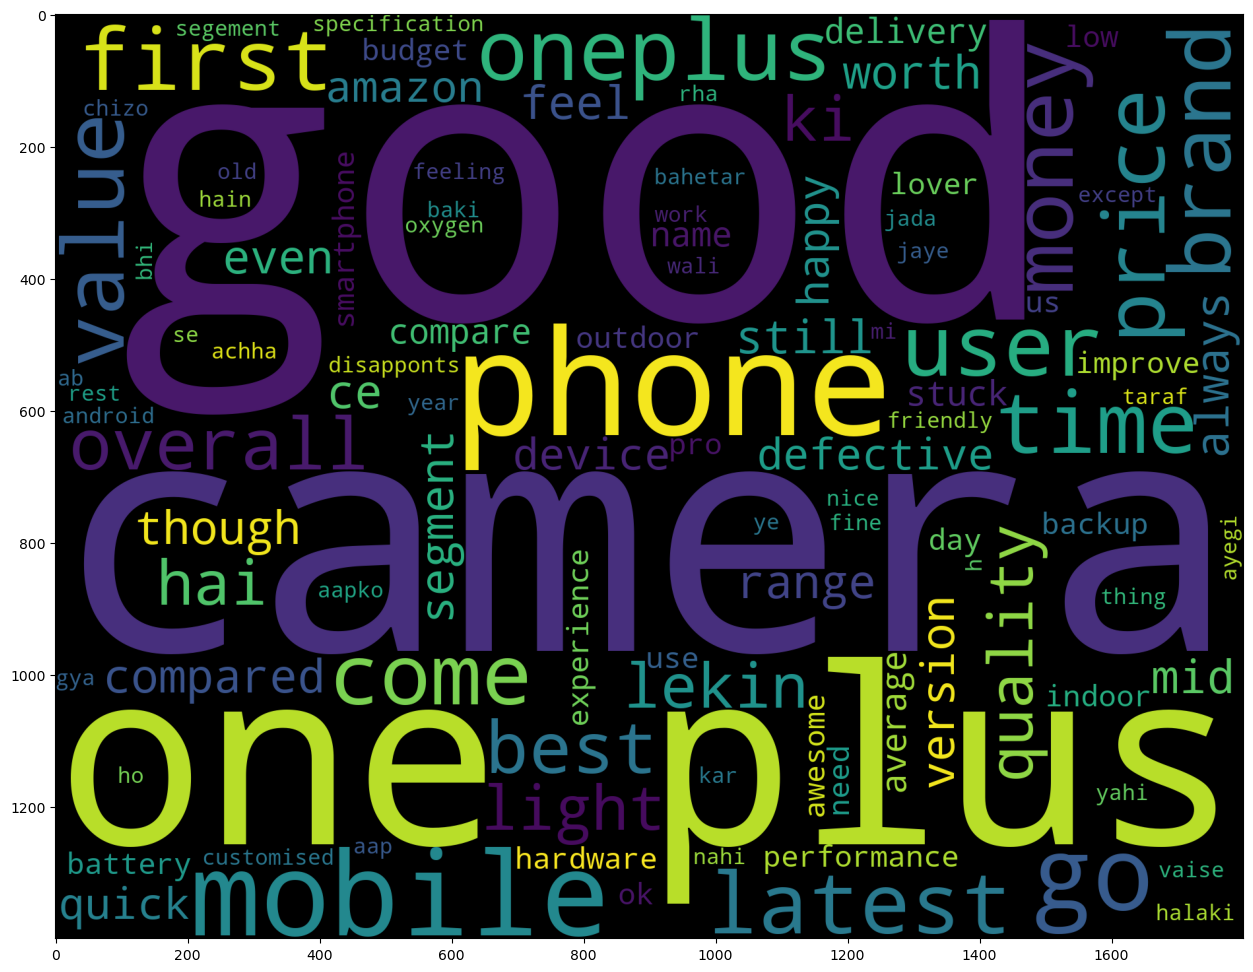

In [157]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

In [158]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

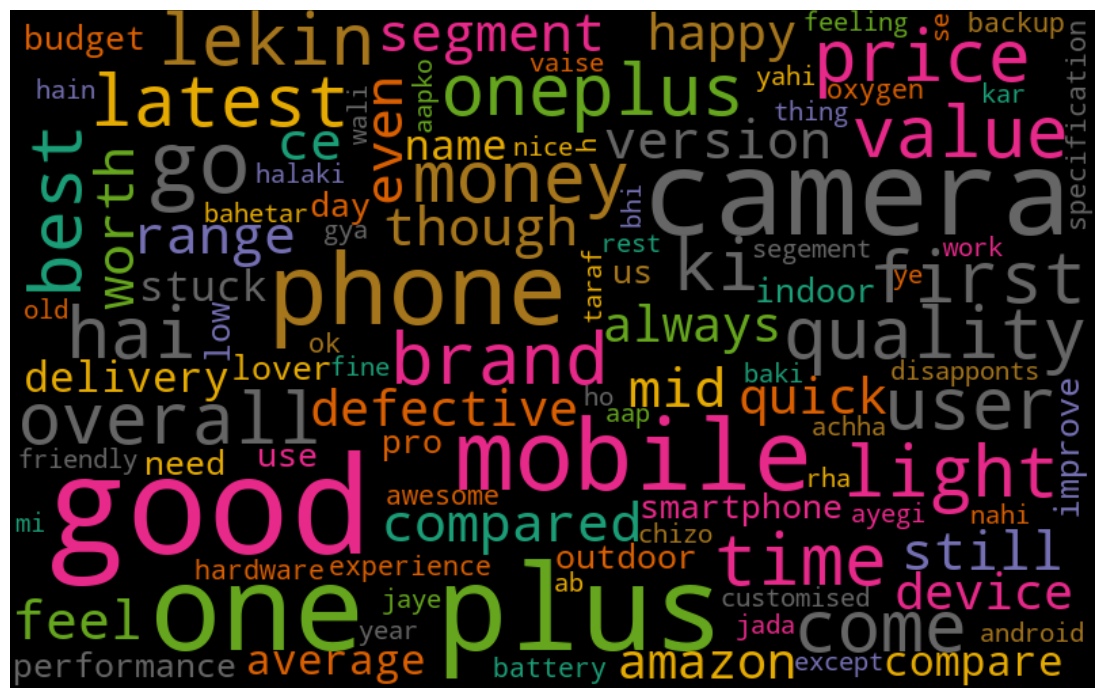

In [159]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)
